# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Stats Review & Intro to SciPy
Week 2 | Lesson 5.1




### LEARNING OBJECTIVES
*After this lesson, you will be able to:*

- Explain Type I and Type II errors
- Explain t-testing and demonstrate it with scipy
- Contrast t-testing with simulation solutions

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 10 min  | [Demo](#introduction)   | Significance levels, Type I and Type II errors  |
| 10 min  | [Demo](#demo)  | Law of large numbers and central limit theorem  |
| 10 min  | [Demo / Guided Practice](#demo)  | T-testing revisited  |
| 20 min  | [Independent Practice](#ind-practice)  | T-testing  |
| 10 min  | [Demo /Guided Practice](#demo)  | Computational approaches  |
| 30 min  | [Independent Practice](#ind-practice)  |  Computational statistics |
| 5 min  | [Conclusion](#conclusion)  | |



## Significance levels, Type I and Type II errors

Type I errors occur when the researcher rejects a null hypothesis when it is actually true. The probability of committing a Type I error is called the significance level, often denoted $\alpha$.

A Type II error occurs when the researcher wrongly accepts a null hypothesis that is false.  The probability of committing a Type II error is often denoted by $\beta$.

$$\alpha\ =\ P(Reject\ H_0\ |\ H_0\ is\ true) = P(Type\ I\ error)$$


$$\beta\ =\ P(Reject\ H_0\ |\ H_a\ is\ true) = P(Type\ II\ error)$$

## Law of large numbers

If $Y_1,\ Y_2\ ...,\ Y_n$ are independently and identically distributed (i.i.d) with mean $\mu$ and finite variance, a sample mean converges in probability to $\mu$.

This means that for sufficiently large N, $\bar{Y}\ -\ \mu$ is ~ 0.

## Central limit theorem

- If $Y_1,\ Y_2\ ...,\ Y_n$ are i.i.d with mean $\mu$ and variance $\sigma^2$, then when *n* is large, sample mean $\hat{\mu}$ is approximately normally distributed with mean $\mu$ and variance $\frac{\sigma^2}{n}$.
- $\hat{\mu}$ is asymptotically normally distributed
- So? Well, this allows us to assume that some random variables are normally distributed, and to make inferences about the likelihood of observations drawn from that distribution. For instance, it implies:

$$\frac{\hat{\mu}\ -\ \mu}{\sigma/\sqrt{n}}\ \sim \ N(0,1)$$

## T-tests revisited

Does $\frac{\hat{\mu}\ -\ \mu}{\sigma/\sqrt{n}}$ look familiar? If we use the sample standard deviation in the denominator, that's the t-statistic!

$$\frac{\hat{\mu}\ -\ \mu}{s/\sqrt{n}}$$

And if n is large, then the value of the t-statistic is approximately normally distributed. (If n is small and the sample observations are normally distributed, then it has a t-distribution.)

$\frac{s}{\sqrt{n}}$ is also called the standard error, $s.e.(\mu)$

## P-values and hypothesis testing, revisited

If we can assume a probability distribution, e.g. N(0,1), then we can calculate the likelihood of seeing some value given that assumption.

![](./norm_dist_probs.jpg)

### Hypothesis testing with t-tests, review

Let's say 1165 bootcamp applicants take a GA admissions test in 2017, with an average score of 60.86 and a standard deviation of 8.02. The expected score for all bootcamp applicants is 59. Do GA applicants have the same expected score?

We can estimate $\mu$, the GA applicant population mean, with our sample mean. $\hat{\mu} = \bar{Y} = 60.86$. The sample standard deviation *s* is 8.02.

Standard error of the estimate is then $se(\hat{\mu}) = \frac{s}{\sqrt{n}} = \frac{8.02}{\sqrt{1165}} = 0.235$

> What are our null and alternative hypotheses?

$$H_0: \mu = 59$$
$$H_a: \mu \neq 59$$

Under $H_0,\ t = \frac{\hat{\mu} - 59}{se(\hat{\mu})}$ is approximate normally distributed with N(0,1). If t falls far on the tail, the p-value is low and we'll reject $H_0$.

Calculate the t-statistic and [look up its p-value](https://graphpad.com/quickcalcs/PValue1.cfm]).



$$t = \frac{60.86 - 59}{0.2350} = 7.915$$

## Again, but now with scipy ('skippy'?)

In [1]:
from scipy import stats
import numpy as np
np.random.seed(7654567)  # fix seed to get the same result - subject of our lab
rvs = stats.norm.rvs(loc=60.86, scale=8.02, size=(1165))

# Note that the mean and std of our generated data aren't precisely the same.
print np.std(rvs), np.mean(rvs)


8.05037070851 61.1582143415


In [9]:
rvs

array([ 53.26524642,  58.64445885,  59.26615073, ...,  57.78177772,
        55.42126582,  65.92945246])

## Which scipy function to use?

A few common t-tests include:
- One-sample t-test. Used to determine whether a hypothesized population
    mean differs significantly from an observed sample mean.
- Two-sample t-test. Used to determine whether the difference between samples means differs significantly from the              hypothesized difference between population means.
- Paired t-test. Used to test the significance of the difference
    between paired means.

Scipy has methods for all of these, and more. Which one do we want?



From the documentation, we want `scipy.stats.ttest_1samp`, for our one-sample t-test.

To verify, compare our formula with the scipy code, [here](https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L3037)


```python
 a, axis = _chk_asarray(a, axis)
    n = a.shape[axis]
    df = n - 1

    d = np.mean(a, axis) - popmean
    v = np.var(a, axis, ddof=1)
    denom = np.sqrt(v / float(n))

    t = np.divide(d, denom)
    t, prob = _ttest_finish(df, t)

    return t, prob
    ```

In [7]:
from scipy import stats
from scipy.stats import nanstd
a, axis = _chk_asarray(a, axis)
n = a.shape[axis]
df = n - 1

d = np.mean(a, axis) - popmean
v = np.var(a, axis, ddof=1)
denom = np.sqrt(v / float(n))

t = np.divide(d, denom)
t, prob = _ttest_finish(df, t)

return t, prob

NameError: name '_chk_asarray' is not defined

## Look good? Okay.

In [10]:
# Test if mean of random sample is equal to true mean, and different mean.
# We reject the null hypothesis in the second case and don’t reject it in the first case.
rvs= [4,7,22,999,22,45]
print stats.ttest_1samp(rvs,59.0)
print stats.ttest_1samp(rvs,61.0)

Ttest_1sampResult(statistic=0.76047707570488365, pvalue=0.48127173166744597)
Ttest_1sampResult(statistic=0.74822778052574457, pvalue=0.48800214359912292)


<a name="ind-practice"></a>
## Independent Practice: classic t-tests (20 minutes)

In pairs or trios, look at the SAT test data from Project 1. (We'll assume it's a sample of results, rather than the population results.) Together, form null and alternative hypotheses about some of the scores. 
(E.g., H0: the mean difference between states' verbal and math scores is 0; or H0: the population math score is 550.)

Choose a significance level and conduct an appropriate t-test.

- [t-tests](http://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python)
- [t distribution](http://stattrek.com/probability-distributions/t-distribution.aspx)

In [13]:
import pandas as pd
df=pd.read_csv('/Users/samanthafalk/GA-DSI/Projects/project-01/assets/sat_scores.csv')

In [15]:
print stats.ttest_rel(df['Verbal'], df['Math'])

Ttest_relResult(statistic=0.23803183309056899, pvalue=0.81281016714386212)


<a name="t-testing"></a>
## Demo/Guided Practice: computational approaches (10 minutes)

Now that computational power is cheap and available (and you know Python!), we have an alternative way of approaching these questions: iteratively calculate the probability of observing some result.

For example:

```Python
# Simulating a binomial variable (e.g. seeing heads in 20 out of 30 coin flips )
m = 0
for i in range(10000):
    trials = np.random.randint(2, size = 30)
    if (trials.sum() >= 20):
        m += 1
p = m / 10000.0
p
```

> Check: what is this doing?

This was an example if **simulating** your experiment -- you can do this if you have an a priori model of what happens.

If you don't have an a priori model, another option is **shuffling** results:

(Example from: http://cs.nyu.edu/shasha/papers/StatisticsIsEasyExcerpt.html)

"Imagine we have given some people a placebo and others a drug. The measured improvement (the more positive the better) is

Placebo: 54 51 58 44 55 52 42 47 58 46

Drug: 54 73 53 70 73 68 52 65 65




"As you can see, the drug seems more effective on the average (the average measured improvement is 63.7 for the drug and 50.7 for the placebo). But is this difference in the average real? Formula-based statistics would use a t-test which entails certain assumptions about normality and variance, but we are going to look just at the samples themselves and shuffle the labels."



What this means can be illustrated as follows. We put all the people in a table having two columns value and label (P for placebo and D for drug).

| value | label |
|:-:|---|
|54	| P |
|51	| P |
|58	| P |
|44	| P |
|55	| P |
|52	| P |
|42	| P |
|47	| P |
|58	| P |
|46	| P |
|54	| D |
|73	| D |
|53	| D |
|70	| D |
|73	| D |
|68	| D |
|52	| D |
|65	| D |
|65	| D |



Shuffling the labels means that we will take the Ps and Ds and randomly distribute them among the patients. (Technically, we do a uniform random permutation of the label column.)

This might give:

| value | label |
|:-:|---|
|54	| P 
|51	| P
|58	| D
|44	| P
|55	| P
|52	| D
|42	| D
|47	| D
|58	| D
|46	| D
|54	| P
|73	| P
|53	| P
|70	| D
|73	| P
|68	| P
|52	| D
|65	| P
|65	| D



We can then look at the difference in the average P value vs. the average D value here. We get an average of 59.0 for P and 54.4 for D. We repeat this shuffle-then-measure procedure 10,000 times and ask what fraction of time we get a difference between drug and placebo greater than or equal to the measured difference of 63.7 - 50.7 = 13. The answer in this case is under 0.001.""

> Check: what are the benefits of a computational strategy? The risks?

<a name="ind-practice"></a>
## Independent Practice: finding probabilities computationally (30 minutes)

In pairs or trios, design and code a computational way of finding the probability of rolling a 6 at least one-third of the time on a fair die.

In [41]:
import numpy as np
data= np.random.randint(1,7, size=(trials,20))

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [133]:
#JPF
m = 0
for i in range(10000):
    trials = np.random.randint(1,7, size = 30)
    #print trials
    #print trials.tolist().count(6)
    if (trials.tolist().count(6) >= 10):
        m += 1
p = m / 10000.0
print m
p

185


0.0185

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([    6.,    68.,   414.,  1345.,  2561.,  2829.,  1885.,   702.,
          170.,    20.]),
 array([  69.,   76.,   83.,   90.,   97.,  104.,  111.,  118.,  125.,
         132.,  139.]),
 <a list of 10 Patch objects>)

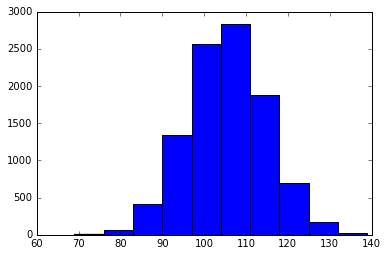

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
trials = 10000.
data = np.random.randint(1,7, size = (trials,30)) # as we increase the sample size, we approach a normal distribution
N = np.sum(data, axis = 1) # sum up the number of heads in rows (experiments)
plt.hist(N)

In [43]:
 [x for x in data if x==6]

SyntaxError: 'return' outside function (<ipython-input-43-9802ec0e5a6c>, line 1)

<a name="conclusion"></a>
## Conclusion (5 mins)

- We make trade-offs between risking Type I and Type II errors
- There are varieties of t-tests, and scipy methods for conducting them
- Simulations / computation strategies are an alternative to parametric statistical inference